In [1]:
import psycopg2
import numpy as np
import pandas as pd
import sklearn as sk
import xgboost as xg
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('/Users/rickbetzler/personal/fun-times-in-python/')

from scripts.utilities import utils
from scripts.utilities import financial_utils

In [3]:
query = """
    select 
        e.symbol
        , e.market_datetime
        , e.open
        , e.high
        , e.low
        , e.close
        , e.volume
        , f.high_52
        , f.low_52
        , f.dividend_amount
        , f.pe_ratio
        , f.quick_ratio
        , f.current_ratio
    from td.equities as e
    left join td.fundamentals as f 
        on f.symbol = e.symbol
    where e.symbol = 'BA'
    order by e.market_datetime
    """

df = utils.query_db(db_connection=utils.DW_STOCKS_JUPYTER, query=query)

OperationalError: could not connect to server: Connection refused
	Is the server running on host "localhost" (::1) and accepting
	TCP/IP connections on port 5432?
could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5432?


In [ ]:
df.tail().T

In [ ]:
plt.scatter(df['volume'], df['open'])
plt.show()

In [ ]:
query = """
    select *
    from td.options 
    where symbol = 'BA'
    """

options = utils.query_db(db_connection=utils.DW_STOCKS_JUPYTER, query=query)

In [ ]:
options[options['description']=='BA Sep 20 2019 385 Call'].T

In [7]:
option = financial_utils.BlackScholes(
    current_stock_price=350,
    strike_price=385,
    risk_free_rate=1.025,
    days_to_maturity=160,
    volatility=.2)

In [8]:
print('Theoretical option price: $' + str(round(option.option_price, 2)))

Theoretical option price: $7.65


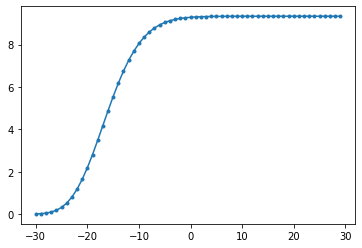

In [9]:
deltas = option.get_greek(greek='delta', steps=30)
plt.plot(deltas, marker='.')
plt.show()

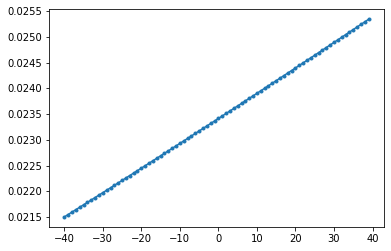

In [10]:
ros = option.get_greek(greek='ro', steps=40)
plt.plot(ros, marker='.')
plt.show()

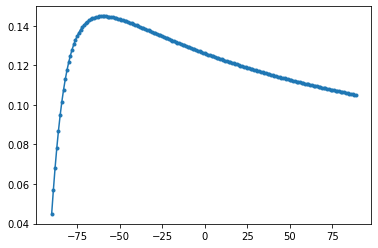

In [11]:
thetas = option.get_greek('theta', steps=90)
plt.plot(thetas, marker='.')
plt.show()

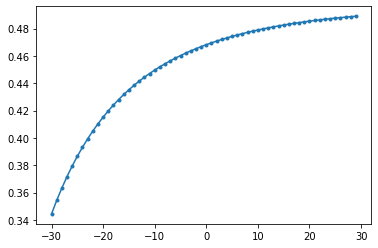

In [12]:
vegas = option.get_greek(greek='vega', steps=30)
plt.plot(vegas, marker='.')
plt.show()

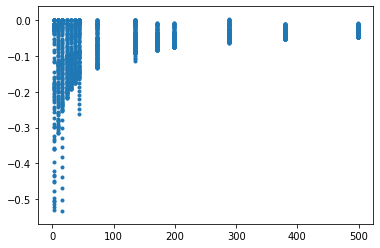

In [10]:
plt.scatter(options['days_to_expiration_date'], options['theta'], marker='.')
plt.show()